# Importing the needed libraries

In [4]:
!pip install imblearn

     -------------------------------------- 257.7/257.7 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [68]:
#Import Statements
import os
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN



In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
data = pd.read_csv("Customer_Churn.csv") 


In [88]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

## Checking Basic and statitical information of the Dataset

In [71]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##Checking for data balance

In [73]:
100*data['Churn'].value_counts()/len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

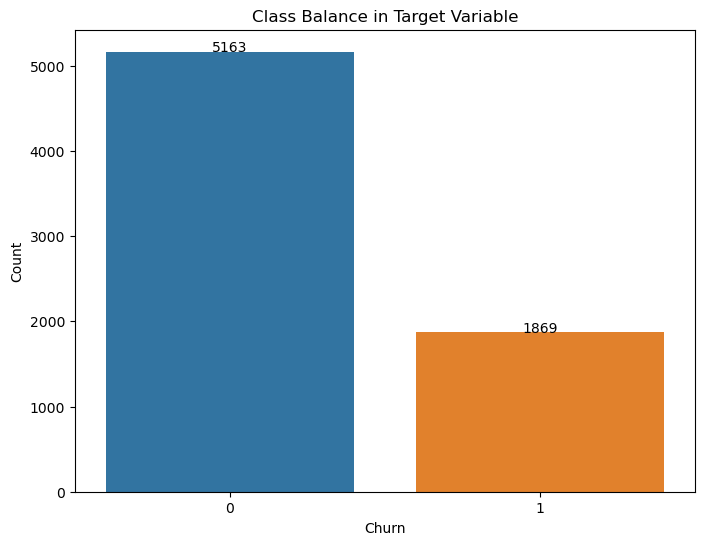

In [66]:
df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Class Balance in Target Variable')
plt.xlabel('Churn')
plt.ylabel('Count')

# Adding value counts
value_counts = df['Churn'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

#There is class imbalance in the dataset

In [74]:
#Checking for unique variables
df.nuniqzue()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           6
dtype: int64

In [87]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')


# Data Cleaning steps

In [12]:
df = data.copy()

In [13]:
#Dropping the customerID column because it is insignificant to the analysis 
df = df.drop(['customerID'], axis=1) 

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# converting object to numeric values, if error it will convert it to NaN value

#Checking for missing value
df.isnull().sum()

handelling the missing value

In [17]:
df.dropna(subset=['TotalCharges'], inplace=True)
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [99]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
The output above shows that there are 11 missing values in the "TotalCharges" colunm

### Checking for outliers in the numerical variables

In [76]:
#Checking for outliers
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges'>

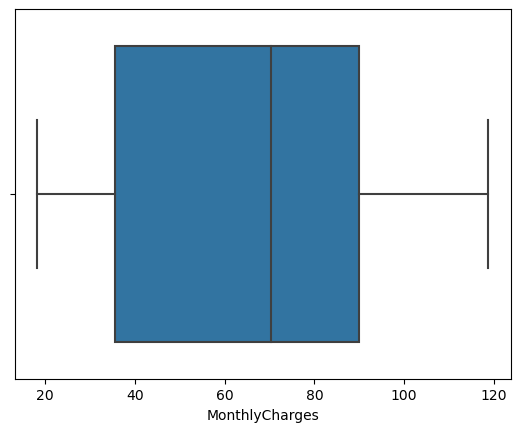

In [78]:
sns.boxplot(x=df["MonthlyCharges"])

<AxesSubplot:xlabel='TotalCharges'>

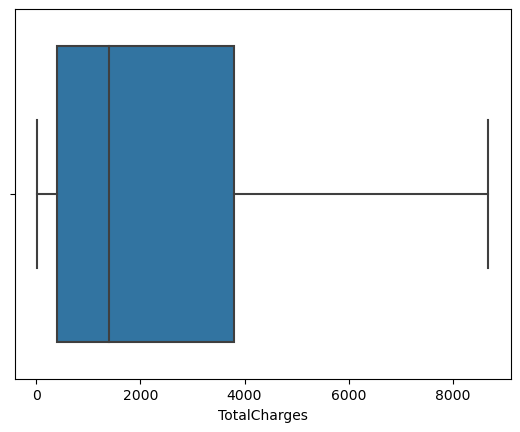

In [92]:
sns.boxplot(x=df["TotalCharges"])

highest value of tenure is 72, it is better to divide it in ranges, 
so making a new column, range is 12 months, like 1-12 months, 13-24 months

In [20]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Now we have tenure group column, we can
drop the old tenure column,

In [22]:
df = df.drop(['tenure'], axis=1) 

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [24]:
df["Churn"] = [1 if i=="Yes" else 0 for i in df["Churn"]]


In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


## Univariate Analysis

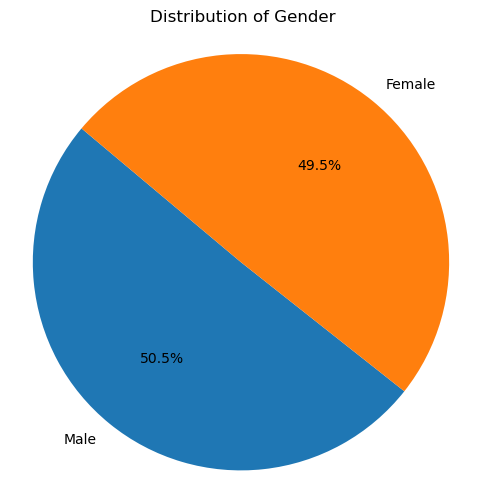

In [59]:
#Gender Distribution
gender_counts = df['gender'].value_counts()

# Pie plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

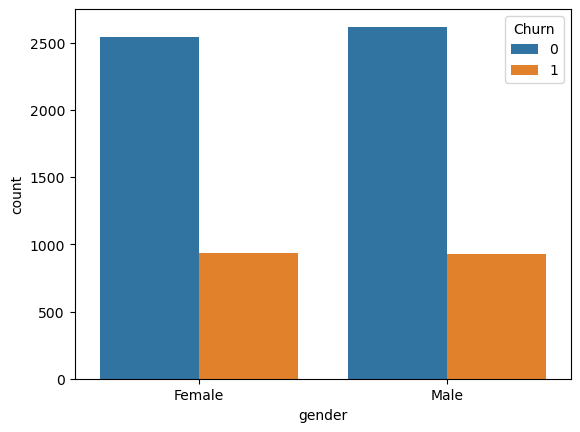

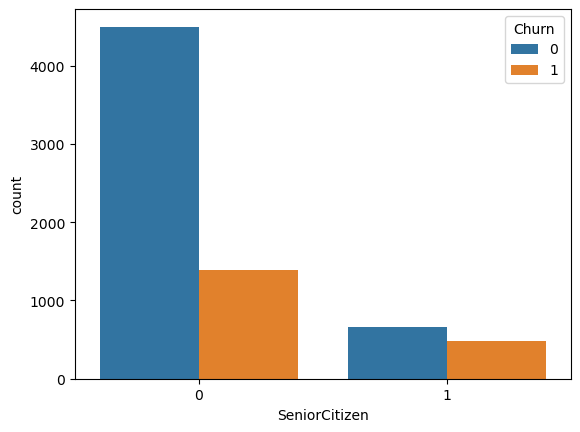

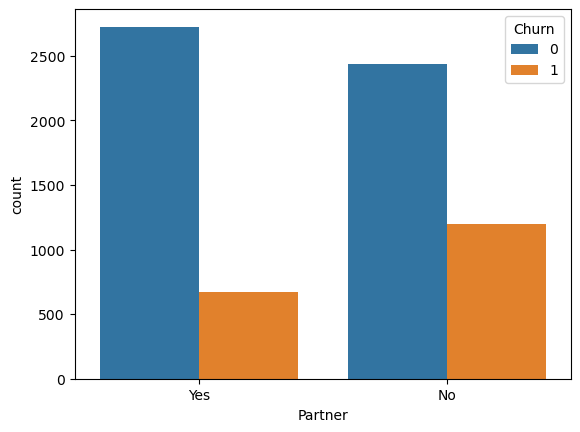

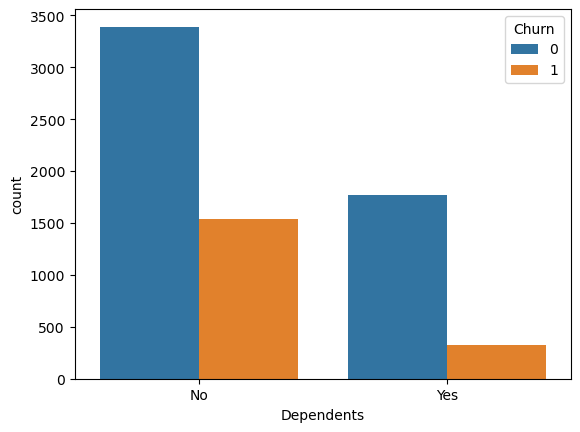

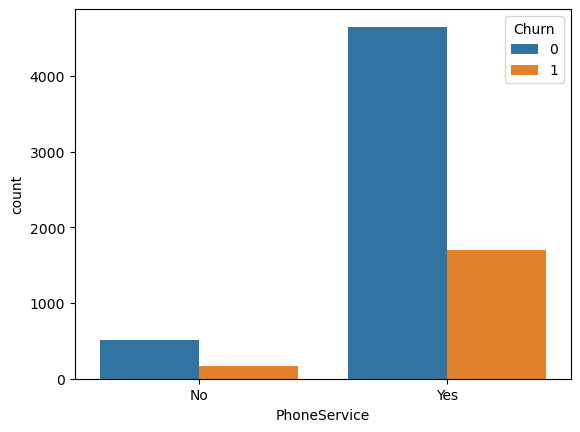

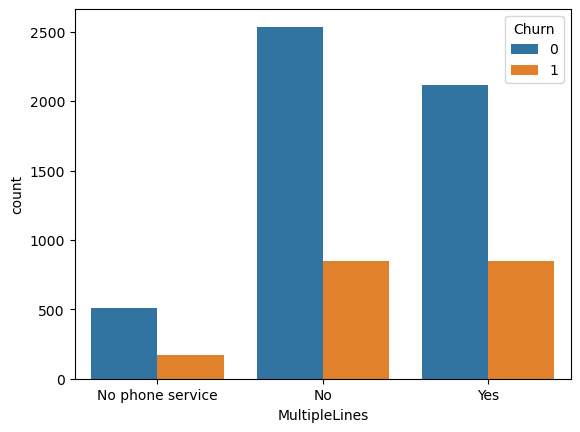

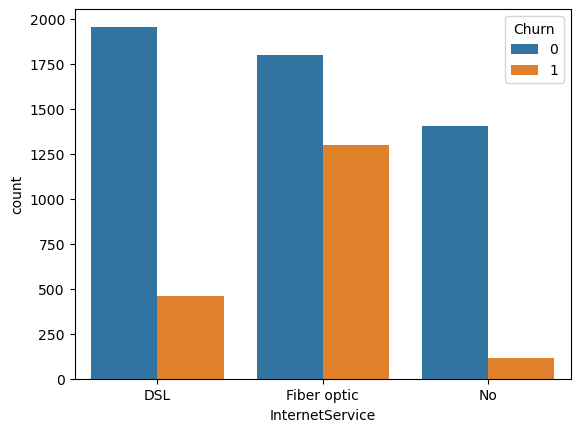

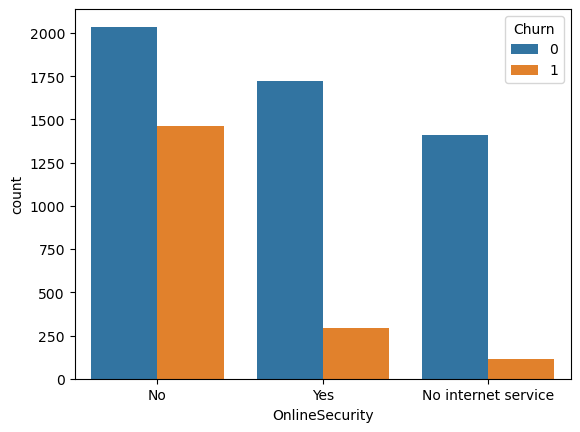

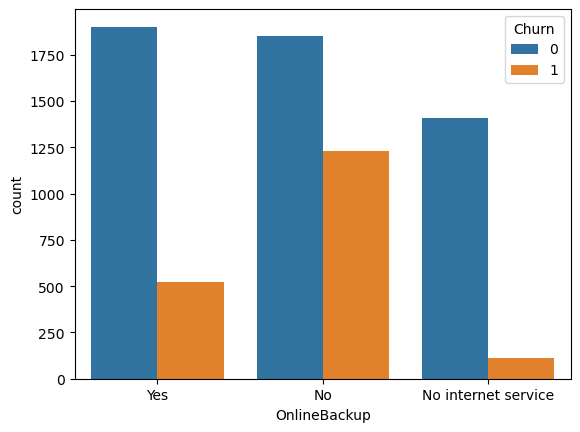

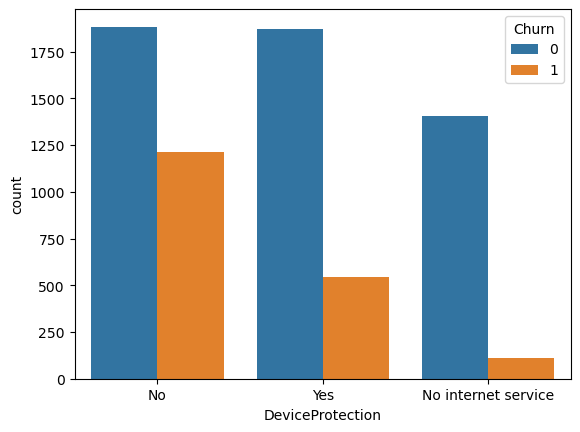

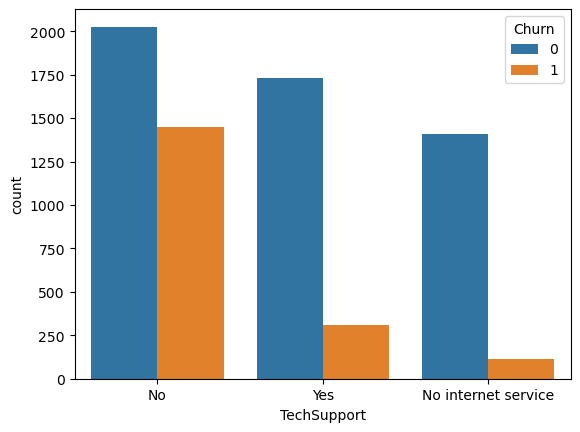

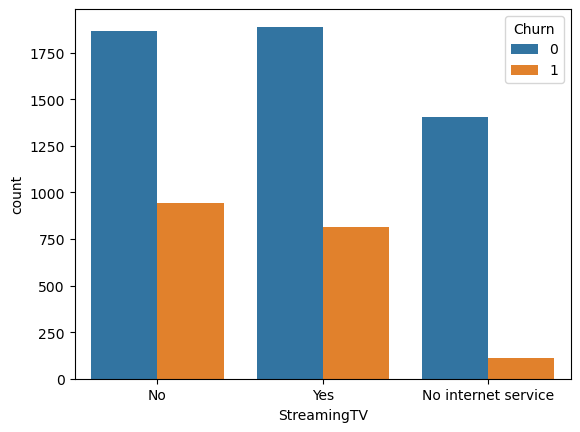

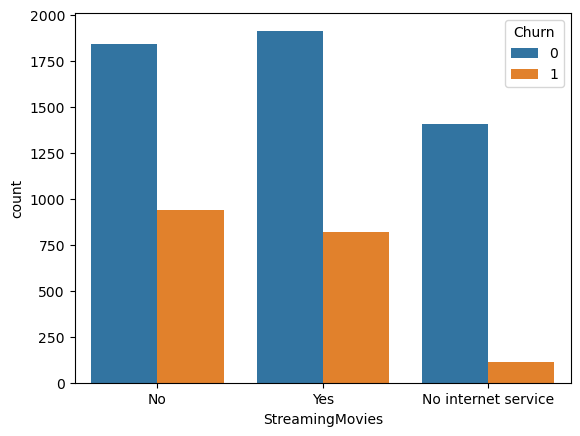

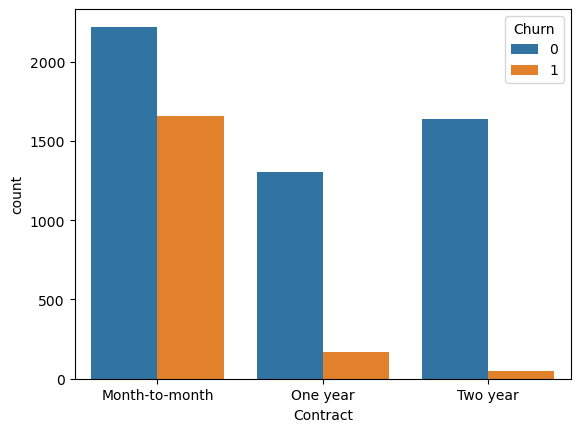

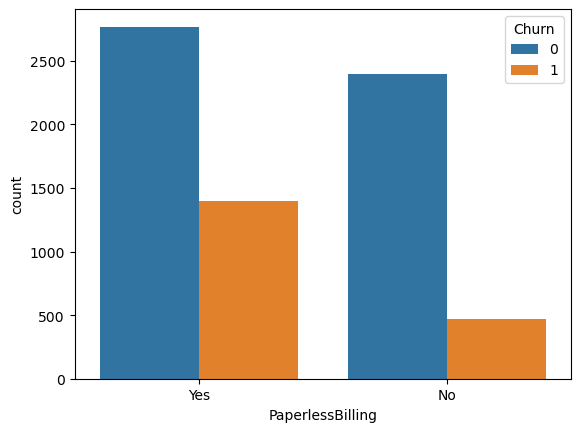

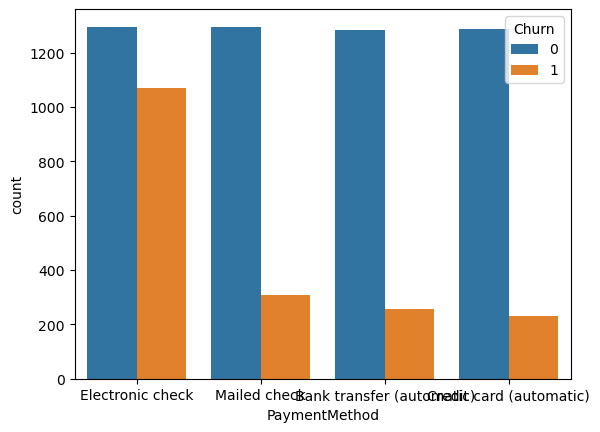

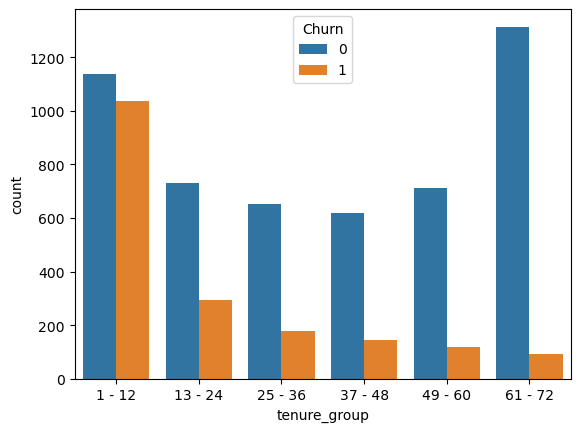

In [26]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

## Multivariate Analysis - Correlation

### One Hot Encoding for Categorical Variables

In [27]:
df_dummies = pd.get_dummies(df)


In [28]:
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

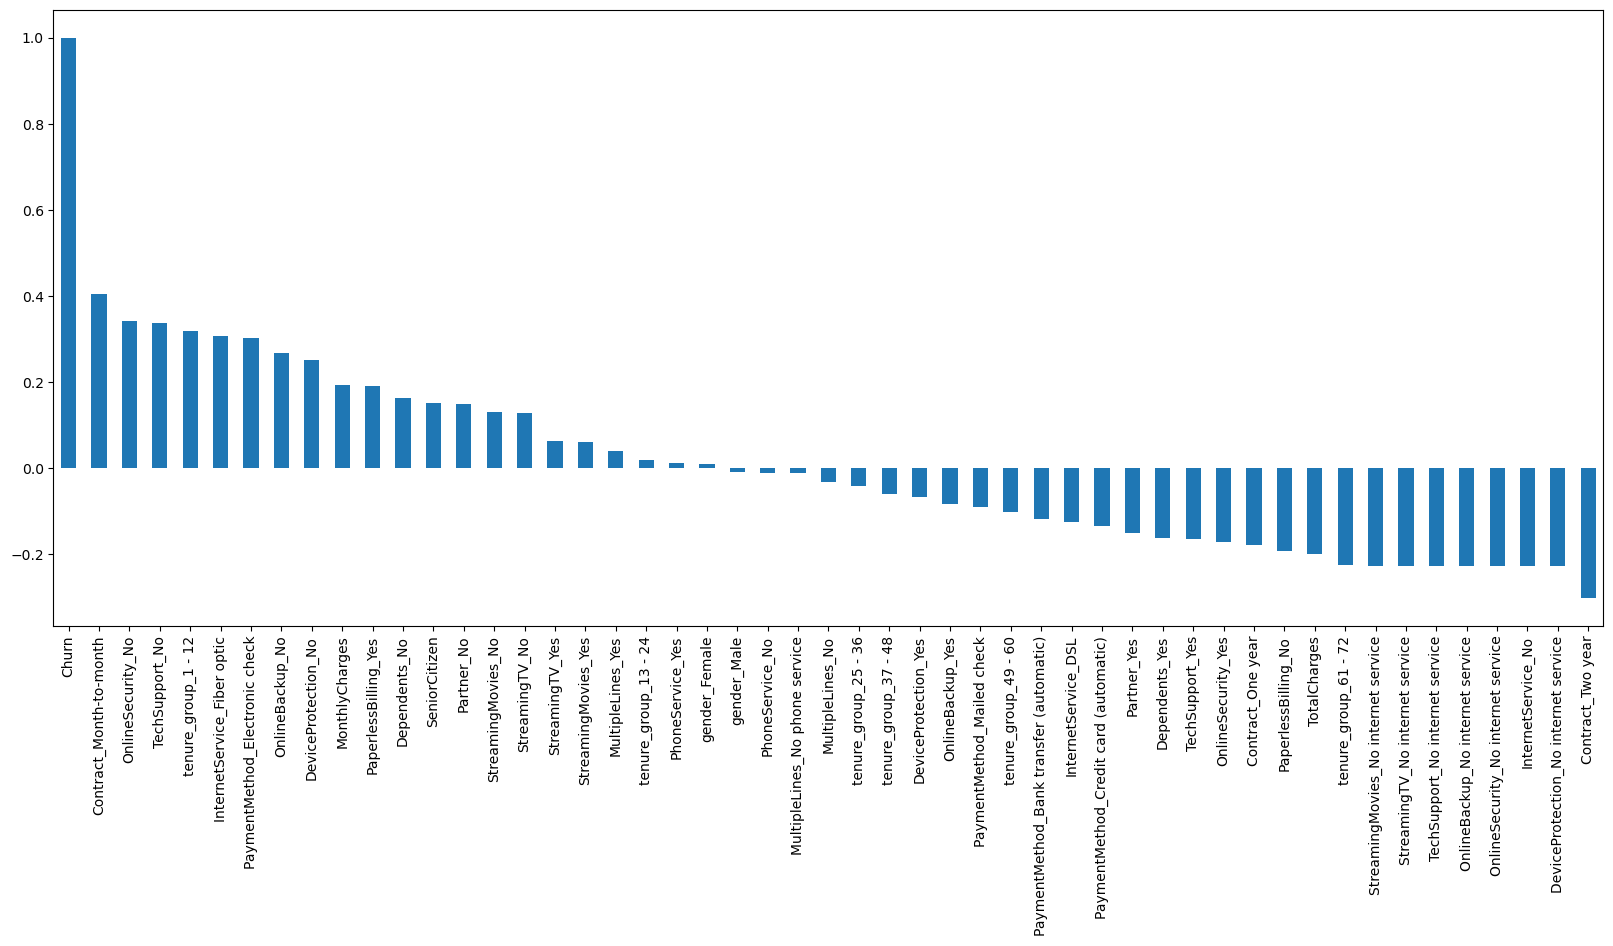

In [29]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

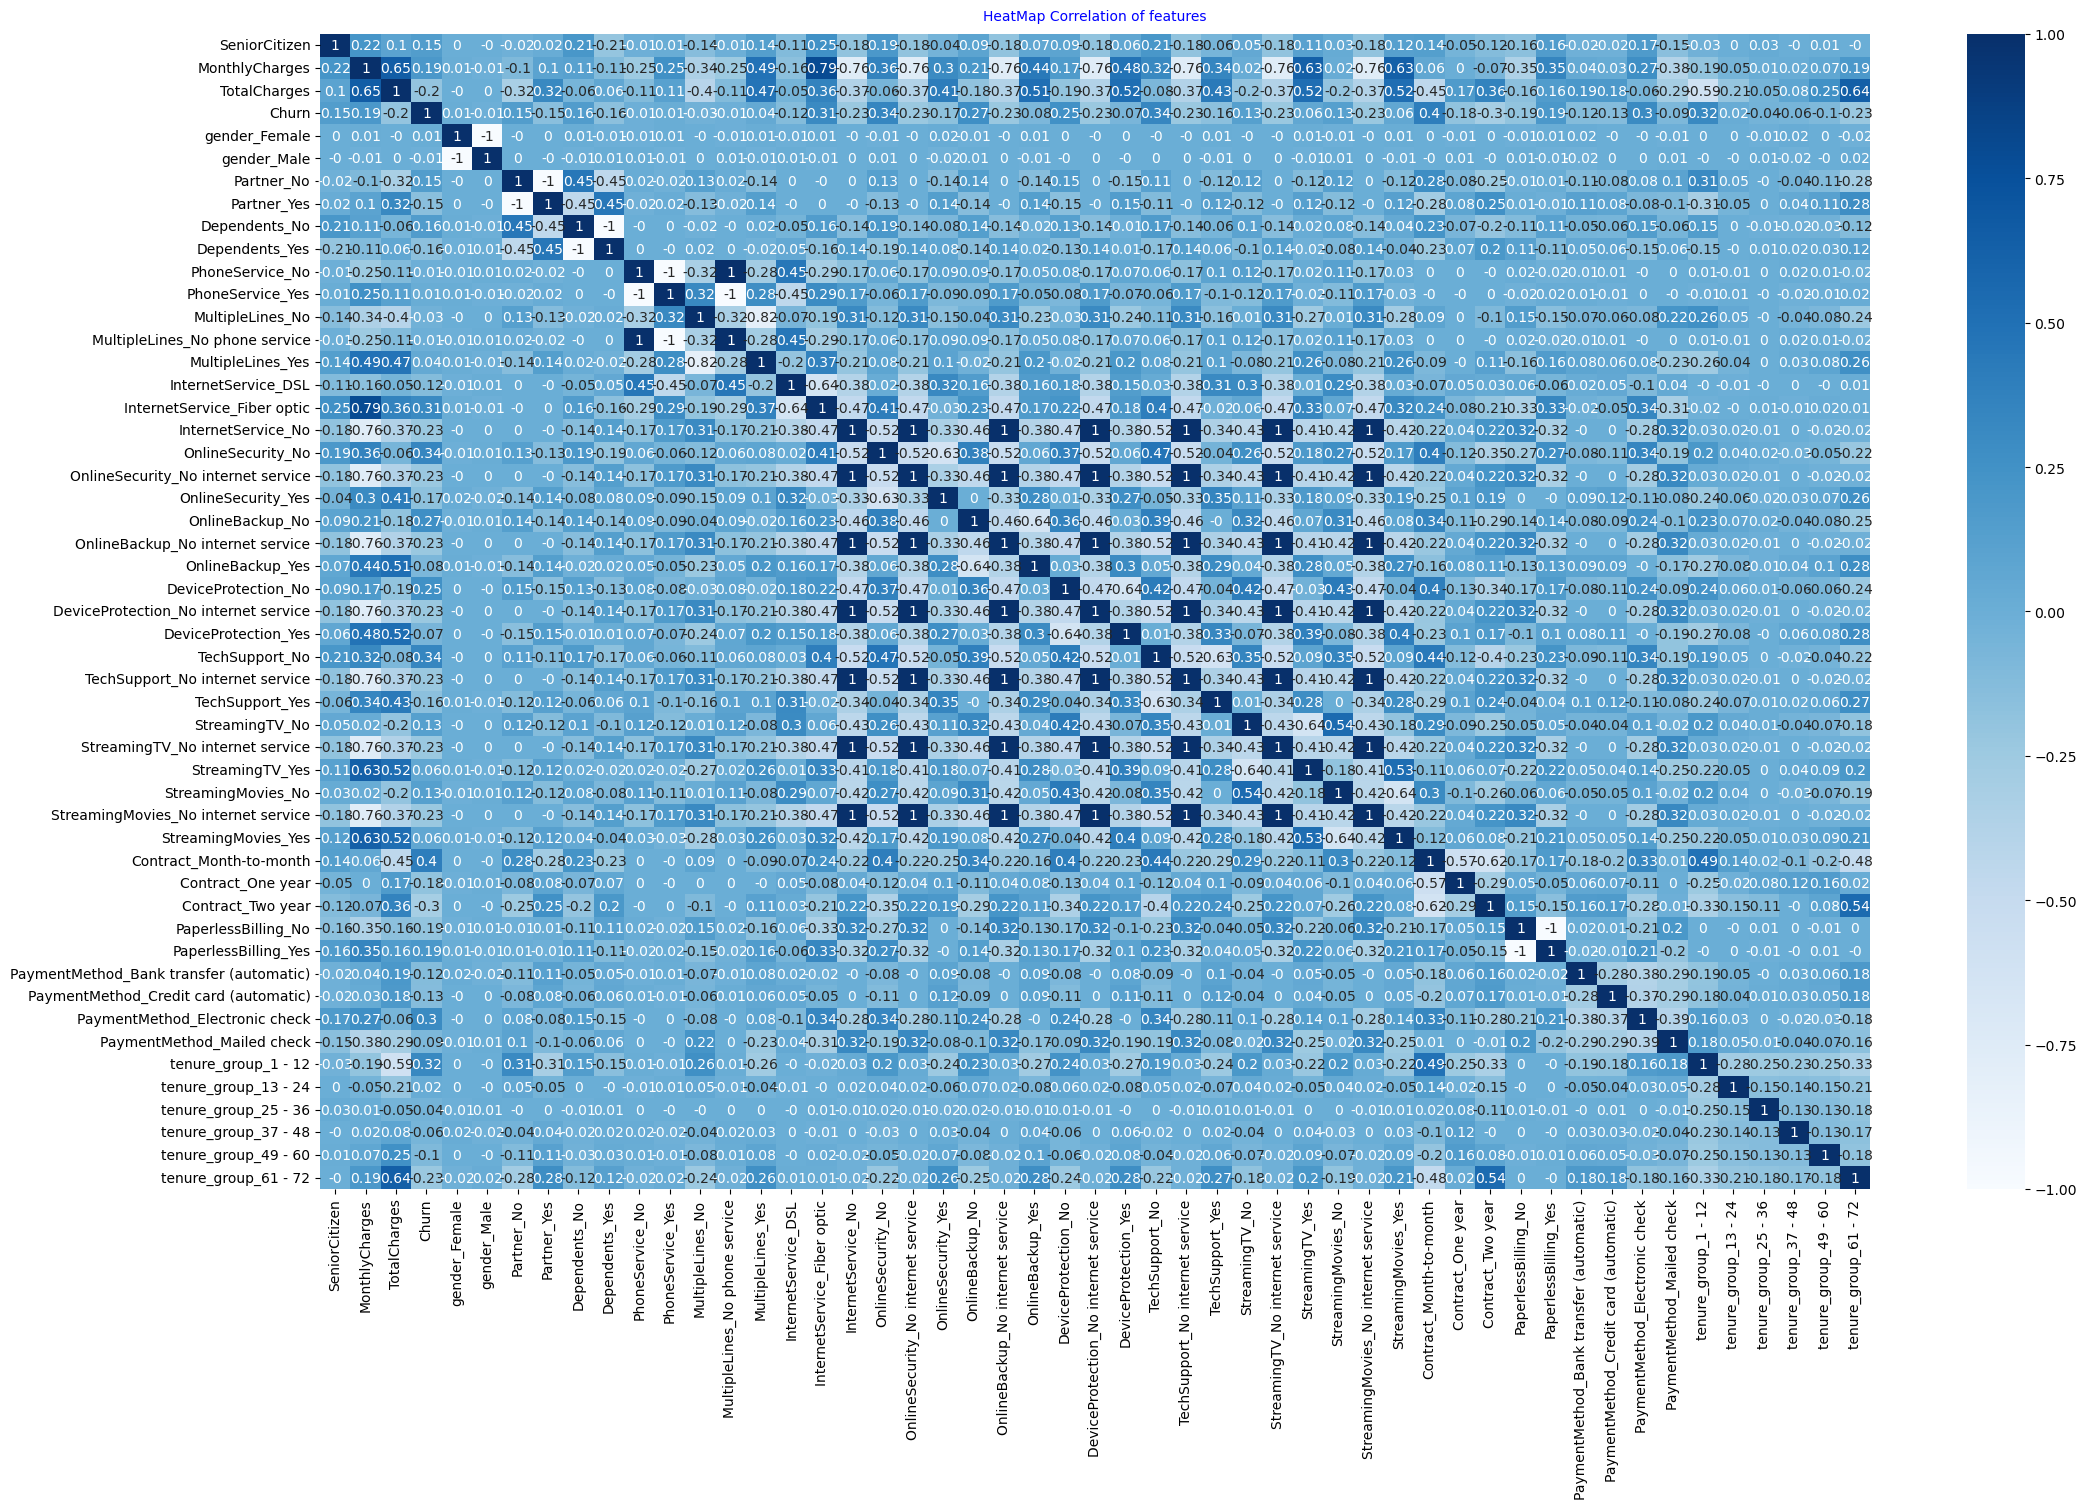

In [107]:
fig , ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_dummies.corr().round(2),annot=True,ax=ax,cmap="Blues")
ax.set_title("HeatMap Correlation of features",size=10,color="Blue",pad=10);


In [ ]:
fig , ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().round(2),annot=True,ax=ax,cmap="Blues")
ax.set_title("HeatMap Correlation of features",size=10,color="Blue",pad=10);

# Some Insights Derived from the EDA

1. People tend to leave when they have month-to-month contracts.
2. If there's no online security or tech support, customers are more likely to leave.
3. People tend to stay longer when they have long-term contracts.
4. If the subscription doesn't include internet, there's less chance of people leaving.
5. New subscribers in their first year tend to stop using the service.
6. Customers with fiber optics internet are more likely to leave.

# Building Classification Models

In [94]:
df_dummies.to_csv('tel_churn_encoded.csv')

In [95]:
new_df = df_dummies.copy()

In [96]:
new_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


## Train Test Split

In [113]:
new_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [114]:
x=new_df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [115]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [116]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 4)

## Experimenting with Logistic Regression Model

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=42,max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [119]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7952

Confusion Matrix:
[[1154  109]
 [ 251  244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1263
           1       0.69      0.49      0.58       495

    accuracy                           0.80      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.78      0.80      0.78      1758



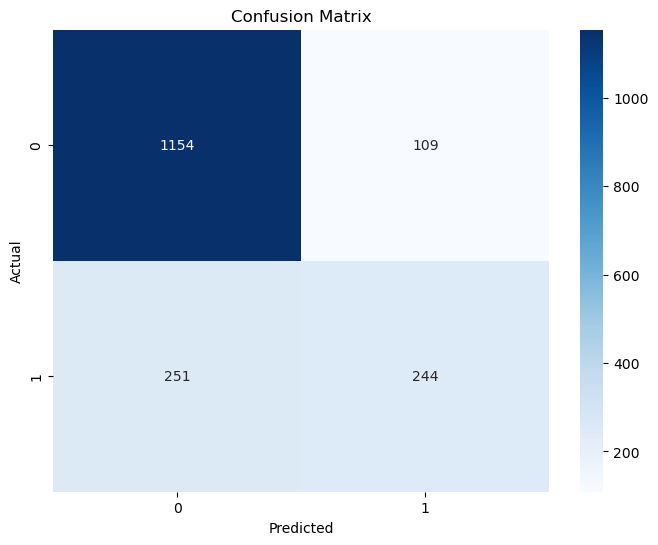

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Observed Low Performance which maybe due to the Imbalance dataset

* precision, recall and f1 score is okk for '0' that is 'not_churn'
* but not performing well on '1', because of imbalanced dataset
* as we have seen above
* Churn:-

*    No  ->   73.463013
*    Yes  ->  26.536987

# Improving model performance by using SMOTE to make the dataset balanced

In [121]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [122]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.25)

In [123]:
model_sm = LogisticRegression(random_state=42,max_iter=1000)
model_sm.fit(xr_train, yr_train)
y_pred_sm = model_sm.predict(xr_test)

In [124]:
accuracy_lr = accuracy_score(yr_test, y_pred_sm)
conf_matrix_lr = confusion_matrix(yr_test, y_pred_sm)
classification_rep_lr = classification_report(yr_test, y_pred_sm)

# Model performes better with SMOTE

In [125]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)
print("\nClassification Report:")
print(classification_rep_lr)

Accuracy: 0.9423

Confusion Matrix:
[[601  37]
 [ 48 788]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       638
           1       0.96      0.94      0.95       836

    accuracy                           0.94      1474
   macro avg       0.94      0.94      0.94      1474
weighted avg       0.94      0.94      0.94      1474



## Experimenting with more models - SVC, RFC, GBC

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(xr_train, yr_train)
    yr_pred = model.predict(xr_test)
    accuracy = accuracy_score(yr_test, yr_pred)
    classification_rep = classification_report(yr_test, yr_pred)
    conf_matrix = confusion_matrix(yr_test, yr_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': conf_matrix
    }



In [46]:
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Classification Report': classification_rep_lr,
    'Confusion Matrix': conf_matrix_lr
}

In [47]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n" + "="*50 + "\n")

Model: SVM
Accuracy: 0.7725
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       668
           1       0.83      0.73      0.78       800

    accuracy                           0.77      1468
   macro avg       0.78      0.78      0.77      1468
weighted avg       0.78      0.77      0.77      1468

Confusion Matrix:
[[551 117]
 [217 583]]


Model: Random Forest
Accuracy: 0.9639
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       668
           1       0.96      0.97      0.97       800

    accuracy                           0.96      1468
   macro avg       0.96      0.96      0.96      1468
weighted avg       0.96      0.96      0.96      1468

Confusion Matrix:
[[636  32]
 [ 21 779]]


Model: Gradient Boosting
Accuracy: 0.9639
Classification Report:
              precision    recall  f1-score   support

           0       0.97     

## Visualising the Accuracy of the Models

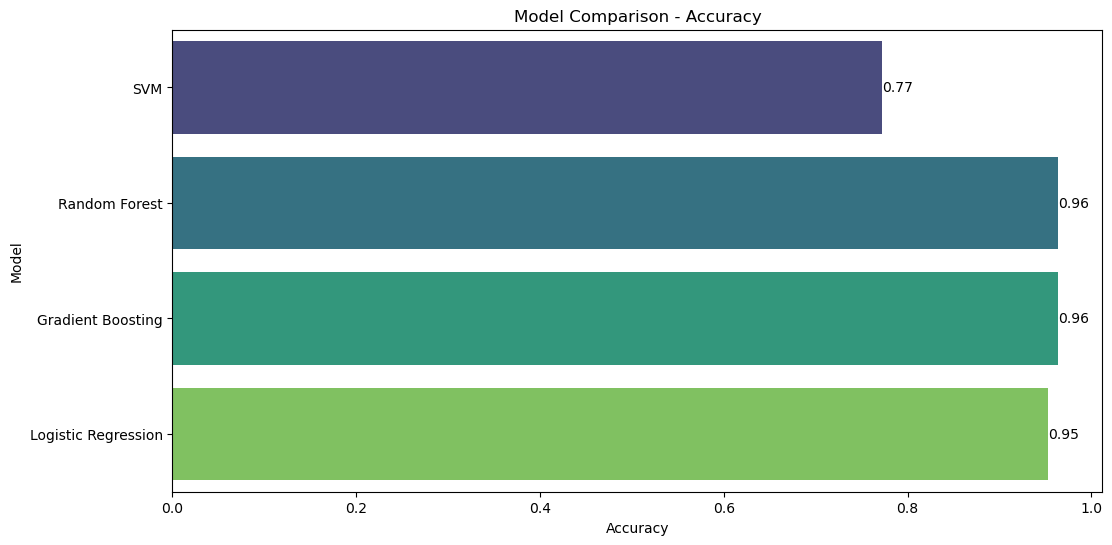

In [97]:
# Extract model names and accuracy values from results dictionary
model_names = list(results.keys())
accuracy_values = [result['Accuracy'] for result in results.values()]

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_values, y=model_names, palette='viridis')

# Add values on the bar plots
for i, v in enumerate(accuracy_values):
    plt.text(v, i, f'{v:.2f}', ha='left', va='center', color='black')

# Set plot title and labels
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Show plot
plt.show()


# Optimising performance by Hyper parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(xr_train, yr_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [50]:
best_model = grid_search.best_estimator_

In [51]:
y_pred_test = best_model.predict(xr_test)
accuracy_test = accuracy_score(yr_test, y_pred_test)

In [52]:
print("Accuracy: ", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(yr_test, y_pred_test))
print("\nClassification Report:\n", classification_report(yr_test, y_pred_test))

Accuracy:  0.967983651226158
Confusion Matrix:
 [[642  26]
 [ 21 779]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       668
           1       0.97      0.97      0.97       800

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



In [53]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(xr_train, yr_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [54]:
best_model_r = grid_search.best_estimator_

In [55]:
y_pred_test_r = best_model_r.predict(xr_test)
accuracy_test_r = accuracy_score(yr_test, y_pred_test_r)

In [57]:
print("Accuracy: ", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix(yr_test, y_pred_test_r))
print("\nClassification Report:\n", classification_report(yr_test, y_pred_test_r))

Accuracy:  0.967983651226158
Confusion Matrix:
 [[642  26]
 [ 21 779]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       668
           1       0.97      0.97      0.97       800

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



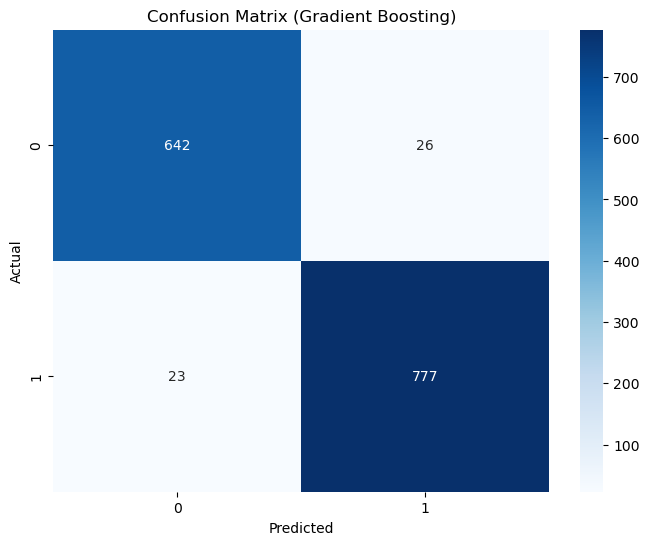

In [127]:
# Confusion Matrix data
conf_matrix_gb = [[642, 26],
                  [23, 777]]

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


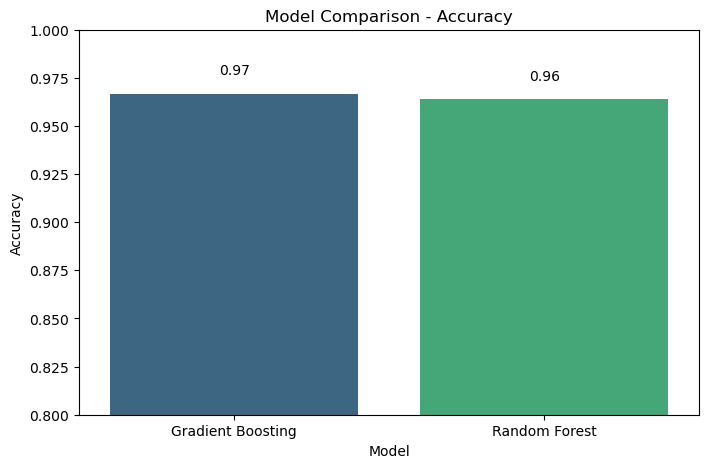

Confusion Matrix (Gradient Boosting):
 [[642  26]
 [ 23 777]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       668
           1       0.97      0.97      0.97       800

    accuracy                           0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468

Confusion Matrix (Random Forest):
 [[637  31]
 [ 22 778]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       668
           1       0.96      0.97      0.97       800

    accuracy                           0.96      1468
   macro avg       0.96      0.96      0.96      1468
weighted avg       0.96      0.96      0.96      1468



In [110]:

# Hyperparameter tuning for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, verbose=1)
grid_search_gb.fit(xr_train, yr_train)
best_model_gb = grid_search_gb.best_estimator_
y_pred_test_gb = best_model_gb.predict(xr_test)
accuracy_test_gb = accuracy_score(yr_test, y_pred_test_gb)

# Hyperparameter tuning for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(xr_train, yr_train)
best_model_rf = grid_search_rf.best_estimator_
y_pred_test_rf = best_model_rf.predict(xr_test)
accuracy_test_rf = accuracy_score(yr_test, y_pred_test_rf)

# Plotting results
models = ['Gradient Boosting', 'Random Forest']
accuracies = [accuracy_test_gb, accuracy_test_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.8, 1.0)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', color='black')
plt.show()

# Print confusion matrix and classification report for Gradient Boosting
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(yr_test, y_pred_test_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(yr_test, y_pred_test_gb))

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix (Random Forest):\n", confusion_matrix(yr_test, y_pred_test_rf))
print("\nClassification Report (Random Forest):\n", classification_report(yr_test, y_pred_test_rf))
